In [82]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
FILEPATH_APPLICATION_TRAIN     = "../data/application_train.csv.f"
FILEPATH_APPLICATION_TEST      = "../data/application_test.csv.f"



# aggregated features
FILEPATH_BUREAU_AGG                  = "../data/bureau_agg_0824.csv.f"
FILEPATH_FEATURE_PREV_APP            = "../data/prev_app_feature_0819_2.csv.f"
FILEPATH_FEATURE_INSTALLMENT_PAYMENT = "../data/prev_insallment_payment_feature_0819.csv.f"
FILEPATH_FEATURE_CC_BALANCE          = "../data/prev_credit_card_balance_feature_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_3M       = "../data/feature_cc_balance_3m_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_6M       = "../data/feature_cc_balance_6m_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_12M      = "../data/feature_cc_balance_12m_0824_1.csv.f"

FILEPATH_FEATURE_POS_CASH_BALANCE    = "../data/POS_CASH_balance_feature_0824_1.csv.f"


In [84]:
df_app_train = pd.read_feather(FILEPATH_APPLICATION_TRAIN)
df_app_test  = pd.read_feather(FILEPATH_APPLICATION_TEST)

df_bureau_agg = pd.read_feather(FILEPATH_BUREAU_AGG)
df_feature_prev_app = pd.read_feather(FILEPATH_FEATURE_PREV_APP)
df_feature_inst_payment = pd.read_feather(FILEPATH_FEATURE_INSTALLMENT_PAYMENT)
df_feature_cc_balance = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE)
df_feature_cc_balance_3m  = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_3M)
df_feature_cc_balance_6m  = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_6M)
df_feature_cc_balance_12m = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_12M)
df_feature_pos_cash_balance = pd.read_feather(FILEPATH_FEATURE_POS_CASH_BALANCE)


In [85]:
df_app_train.shape

(307511, 122)

In [86]:
df_app_test.shape

(48744, 121)

### condatenate train and test data

In [87]:
df_app_all = pd.concat([df_app_train, df_app_test])
del df_app_train
del df_app_test

In [88]:
df_app_all.shape

(356255, 122)

In [89]:
df_app_all['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

### join other tables

In [90]:
df_app_all = pd.merge(df_app_all, df_bureau_agg, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_prev_app, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_inst_payment, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_3m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_6m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_12m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_pos_cash_balance, on = 'SK_ID_CURR', how='left')




In [91]:
df_app_all.shape

(356255, 388)

In [92]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [93]:
# Missing values statistics
missing_values = missing_values_table(df_app_all)
missing_values.head(20)

Your selected dataframe has 388 columns.
There are 334 columns that have missing values.


,Missing Values,% of Total Values
p_avg_RATE_INTEREST_PRIVILEGED,350534,98.4
p_avg_RATE_INTEREST_PRIMARY,350534,98.4
cc_bal__3mAMT_PAYMENT_CURRENT,285314,80.1
cc_bal__6mAMT_PAYMENT_CURRENT,285314,80.1
cc_bal__12mAMT_PAYMENT_CURRENT,285314,80.1
cc_bal__12mAMT_DRAWINGS_ATM_CURRENT,285233,80.1
cc_bal__6mCNT_DRAWINGS_ATM_CURRENT,285233,80.1
cc_bal__6mAMT_DRAWINGS_OTHER_CURRENT,285233,80.1
cc_bal__6mAMT_DRAWINGS_ATM_CURRENT,285233,80.1
cc_bal__3mCNT_DRAWINGS_POS_CURRENT,285233,80.1


In [94]:
# Number of each type of column
df_app_all.dtypes.value_counts()

float64    332
int64       40
object      16
dtype: int64

In [95]:
# Number of unique classes in each object column
df_app_all.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

### Encoding Categorical Values(1) Target Encoding

As for OCCUPATION_TYPE and ORGANIZATION_TYPE, execute target encoding.

In [96]:
from sklearn.model_selection import KFold
target_enc_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

for target_enc_col in target_enc_cols:
    print(target_enc_col)
    target_mean = df_app_all.groupby(target_enc_col).TARGET.mean()
    df_app_all[target_enc_col] = df_app_all[target_enc_col].map(target_mean)


OCCUPATION_TYPE
ORGANIZATION_TYPE


In [97]:
df_app_all['OCCUPATION_TYPE'].head()

0    0.105788
1    0.063040
2    0.105788
3    0.105788
4    0.063040
Name: OCCUPATION_TYPE, dtype: float64

### Encoding Categorical Values

columns which have two unique values            -> Label Encoding<br>
columns which have more than three unique values -> One-hot Encoding

In [98]:
KEY_COLUMN = 'SK_ID_CURR'



label encoding

In [99]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_app_all:
    if df_app_all[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_app_all[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_app_all[col])
            # Transform both training and testing data
            df_app_all[col] = le.transform(df_app_all[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
        else:
            df_app_all.drop(columns = col, inplace=True)
print('%d columns were label encoded.' % le_count)

print('shape :', df_app_all.shape)

3 columns were label encoded.
shape : (356255, 377)


One-hot encoding

In [100]:
# one-hot encoding of categorical variables
df_app_all = pd.get_dummies(df_app_all)
print('shape :', df_app_all.shape)


shape : (356255, 377)


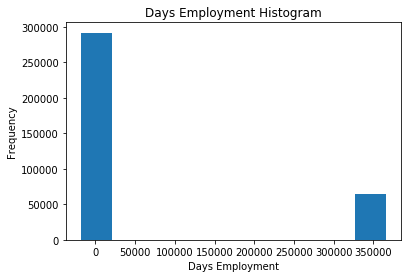

In [101]:
df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [102]:
anom = df_app_all[df_app_all['DAYS_EMPLOYED'] == 365243]
non_anom = df_app_all[df_app_all['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 64648 anomalous days of employment


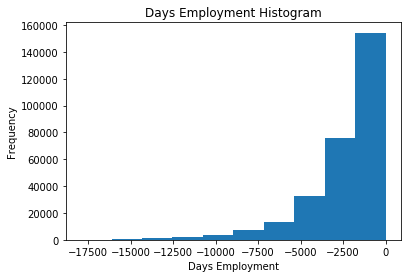

In [103]:
# Create an anomalous flag column
df_app_all['DAYS_EMPLOYED_ANOM'] = df_app_all["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_app_all['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [104]:
# Find the correlation of the positive days since birth and target
df_app_all['DAYS_BIRTH'] = abs(df_app_all['DAYS_BIRTH'])
df_app_all['DAYS_BIRTH'].corr(df_app_all['TARGET'])

-0.07823930830982709

In [105]:
df_app_all.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'pcb_NAME_CONTRACT_STATUS_Returned to the store_sum_sum',
       'pcb_NAME_CONTRACT_STATUS_Signed_sum_sum',
       'pcb_NAME_CONTRACT_STATUS_Amortized debt_avg',
       'pcb_NAME_CONTRACT_STATUS_Approved_avg',
       'pcb_NAME_CONTRACT_STATUS_Canceled_avg',
       'pcb_NAME_CONTRACT_STATUS_Completed_avg',
       'pcb_NAME_CONTRACT_STATUS_Demand_avg',
       'pcb_NAME_CONTRACT_STATUS_Returned to the store_avg',
       'pcb_NAME_CONTRACT_STATUS_Signed_avg', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=378)

### Add Extracted Features

In [106]:
app_all_domain = df_app_all.copy()

df_app_all['ap_ex_LOG_AMT_INCOME_TOTAL'] = np.log1p(df_app_all['AMT_INCOME_TOTAL'])
df_app_all['ap_ex_CREDIT_INCOME_PERCENT'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_ANNUITY_INCOME_PERCENT'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_CREDIT_TERM'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_CREDIT']
df_app_all['ap_ex_DAYS_EMPLOYED_PERCENT'] = df_app_all['DAYS_EMPLOYED'] / df_app_all['DAYS_BIRTH']

In [107]:
print(app_all_domain.shape)

(356255, 378)


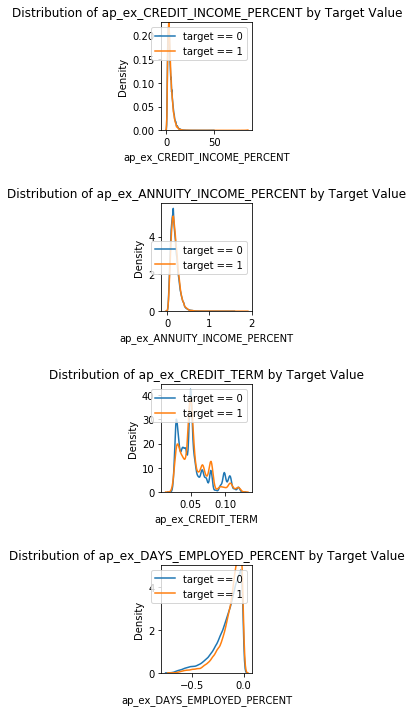

In [108]:
plt.figure(figsize = (4, 10))
# iterate through the new features
for i, feature in enumerate(['ap_ex_CREDIT_INCOME_PERCENT', 
                             'ap_ex_ANNUITY_INCOME_PERCENT', 
                             'ap_ex_CREDIT_TERM',
                             'ap_ex_DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### split train and test

In [109]:
df_app_test = df_app_all[df_app_all['TARGET'].isnull()].drop(columns = ['TARGET'])
df_app_train = df_app_all[df_app_all['TARGET'].notnull()]



In [110]:
df_app_test.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,pcb_NAME_CONTRACT_STATUS_Completed_avg,pcb_NAME_CONTRACT_STATUS_Demand_avg,pcb_NAME_CONTRACT_STATUS_Returned to the store_avg,pcb_NAME_CONTRACT_STATUS_Signed_avg,DAYS_EMPLOYED_ANOM,ap_ex_LOG_AMT_INCOME_TOTAL,ap_ex_CREDIT_INCOME_PERCENT,ap_ex_ANNUITY_INCOME_PERCENT,ap_ex_CREDIT_TERM,ap_ex_DAYS_EMPLOYED_PERCENT
307511,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222222,0.0,0.0,0.000000,False,11.813037,4.213333,0.152300,0.036147,-0.121044
307512,17370.0,222768.0,180000.0,99000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.090909,0.0,0.0,0.090909,False,11.502885,2.250182,0.175455,0.077973,-0.247398
307513,69777.0,663264.0,630000.0,202500.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.083333,0.0,0.0,0.027778,False,12.218500,3.275378,0.344578,0.105202,-0.222477
307514,49018.5,1575000.0,1575000.0,315000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.064516,0.0,0.0,0.000000,False,12.660331,5.000000,0.155614,0.031123,-0.133515
307515,32067.0,625500.0,625500.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076923,0.0,0.0,0.000000,False,12.100718,3.475000,0.178150,0.051266,-0.168021


In [122]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, Imputer
import lightgbm as lgb
import gc

lgb_params_org = {
    'num_iterations':500,
    'num_leaves':31,
    'objective': 'binary', 
    'learning_rate':0.05, 
    'reg_alpha':1, 
    'reg_lambda':0.1, 
    'min_split_gain':.01,
    'min_child_weight':3,
    'boosting_type':'gbdt',
    'metric':'auc',
    'subsample':0.9,
    'seed':50 ,
    'verbose':0
}

def kfold_predict_lgb(features, test_features, n_folds = 5):
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']    

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    print('Testing Data Shape: ', test_features.shape)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions_lgb = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # And here we create 2nd level feeature matrix, init it with zeros first
    X_train_level2 = np.zeros([train_ids.shape[0], 1])
    X_test_level2  = np.zeros([test_ids.shape[0], 1])
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features    = features[train_indices]
        train_labels      = labels[train_indices]                        
                                                            
        # Validation data for the fold
        valid_features    = features[valid_indices]
        valid_labels      = labels[valid_indices]
        
        ### LightGBM
        
        # Train the model
        lgb_train = lgb.Dataset(train_features, train_labels)
        lgb_eval = lgb.Dataset(valid_features, valid_labels, reference=lgb_train)
        
        lgb_params_cur = lgb_params_org.copy()
        model_lgb = lgb.train(lgb_params_cur,
                          train_set = lgb_train,
                          valid_sets = lgb_eval,
                          valid_names=['train','valid'], 
                          verbose_eval = 100,
                          early_stopping_rounds = 20)
        
        # Record the best iteration
        best_iteration = model_lgb.best_iteration
        
        # Record the feature importances
        feature_importance_values += model_lgb.feature_importance() / k_fold.n_splits
        
        # Make predictions
        train_preds_lgb = model_lgb.predict(train_features, num_iteration = best_iteration)
        valid_preds_lgb = model_lgb.predict(valid_features, num_iteration = best_iteration)
        test_pred_lgb   = model_lgb.predict(test_features, num_iteration = best_iteration)
        test_predictions_lgb += test_pred_lgb / k_fold.n_splits
        
        # Record the best score
        valid_score_lgb = roc_auc_score(valid_labels, valid_preds_lgb)
        train_score_lgb = roc_auc_score(train_labels, train_preds_lgb)
        valid_scores.append(valid_score_lgb)
        train_scores.append(train_score_lgb)
        
        print('Valid Score:{:.4f}, Train Score:{:.4f}'.format(valid_score_lgb, train_score_lgb))
        
        ### Put into Lv.2 Features
        X_train_level2[valid_indices, 0] = valid_preds_lgb
        
        # Clean up memory
        gc.enable()
        del model_lgb, train_features, valid_features
        gc.collect()
    
    # generate test predictions
    X_test_level2[:, 0] = test_predictions_lgb

    return X_train_level2, X_test_level2

    


In [123]:
# logistic regression with kfold
def kfold_predict_lr(features, test_features, n_folds = 5):

    # Extract the ids
    train_ids = features['SK_ID_CURR']

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

  
    # Extract feature names
    feature_names = list(features.columns)
    
    # Impute and Scale Features for logistic regression
    # Median imputation of missing values
    # Scale each feature to 0-1
    imputer = Imputer(strategy = 'median')
    imputer.fit(features)

    features = imputer.transform(features)
    test_features = imputer.transform(test_features)

    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(features)
    
    features = scaler.transform(features)
    test_features  = scaler.transform(test_features)

    # Convert to np arrays
    features = np.array(features)
    test_features  = np.array(test_features)

    print('Training Data Shape: ', features.shape)
        
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
        
    # Empty array for test predictions
    test_predictions  = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # And here we create 2nd level feeature matrix, init it with zeros first
    X_train_level2 = np.zeros([train_ids.shape[0], 1])
    X_test_level2  = np.zeros([test_ids.shape[0], 1])
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features = features[train_indices]
        train_labels   = labels[train_indices]                        
                                                            
        # Validation data for the fold
        valid_features = features[valid_indices]
        valid_labels   = labels[valid_indices]
        
        ### Linear Regression

        # Make the model with the specified regularization parameter
        log_reg = LogisticRegression(C = 0.0001)
        log_reg.fit(train_features, train_labels)
        train_preds = log_reg.predict_proba(train_features)[:, 1]
        valid_preds = log_reg.predict_proba(valid_features)[:, 1]
        test_preds  = log_reg.predict_proba(test_features)[:, 1]
        test_predictions += test_preds / k_fold.n_splits

        # Record the best score
        valid_score = roc_auc_score(valid_labels, valid_preds)
        train_score = roc_auc_score(train_labels, train_preds)
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        print('Valid Score:{:.4f}, Train Score:{:.4f}'.format(valid_score, train_score))

        
        ### Put into Lv.2 Features
        X_train_level2[valid_indices, 0] = valid_preds
        
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
    
    # generate test predictions
    X_test_level2[:, 0] = test_predictions
    
    return X_train_level2, X_test_level2


In [124]:
X_train_level2_lgb, X_test_level2_lgb = kfold_predict_lgb(df_app_train, df_app_test)


Testing Data Shape:  (48744, 381)
Training until validation scores don't improve for 20 rounds.
[100]	train's auc: 0.770872
[200]	train's auc: 0.778065
[300]	train's auc: 0.779536
Early stopping, best iteration is:
[340]	train's auc: 0.779677
Valid Score:0.7797, Train Score:0.8508
Training until validation scores don't improve for 20 rounds.
[100]	train's auc: 0.771042
[200]	train's auc: 0.778544
[300]	train's auc: 0.77957
Early stopping, best iteration is:
[314]	train's auc: 0.779934
Valid Score:0.7799, Train Score:0.8462
Training until validation scores don't improve for 20 rounds.
[100]	train's auc: 0.775091
[200]	train's auc: 0.782218
[300]	train's auc: 0.783165
Early stopping, best iteration is:
[356]	train's auc: 0.783696
Valid Score:0.7837, Train Score:0.8523
Training until validation scores don't improve for 20 rounds.
[100]	train's auc: 0.773196
[200]	train's auc: 0.780363
[300]	train's auc: 0.781851
Early stopping, best iteration is:
[356]	train's auc: 0.782278
Valid Score:0.

In [125]:
X_train_level2_lr, X_test_level2_lr   = kfold_predict_lr(df_app_train, df_app_test)

X_train_level2 = np.c_[X_train_level2_lgb, X_train_level2_lr]
X_test_level2  = np.c_[X_test_level2_lgb, X_test_level2_lr]

Training Data Shape:  (307511, 381)
Valid Score:0.6975, Train Score:0.6973
Valid Score:0.6959, Train Score:0.6972
Valid Score:0.6945, Train Score:0.6970
Valid Score:0.6973, Train Score:0.6972
Valid Score:0.6978, Train Score:0.6963


Best alpha: 1.000000; Corresponding auc score on train: 0.781020


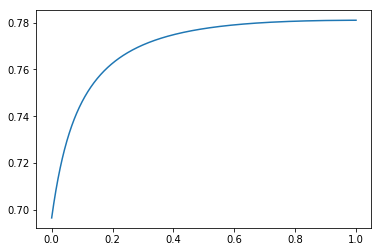

In [126]:
alphas_to_try = np.linspace(0, 1, 1001)
y_train_level2 = df_app_train['TARGET'] 

scores = np.array([roc_auc_score(y_train_level2,
                            alpha * X_train_level2[:, 0]+(1-alpha)*X_train_level2[:, 1])
                   for alpha in alphas_to_try])
plt.plot(alphas_to_try, scores)
best_alpha = alphas_to_try[scores.argmax()]

roc_train_simple_mix = scores.max()

print('Best alpha: %f; Corresponding auc score on train: %f' % (best_alpha, roc_train_simple_mix))



In [140]:
test_ids = df_app_test['SK_ID_CURR']    
test_predictions = (X_test_level2_lgb * best_alpha + X_test_level2_lr * (1-best_alpha))[:, 0]

test_ids.shape
test_predictions.shape

(48744,)

In [141]:

# Make the submission dataframe
submission_df = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

In [142]:
submission_df.to_csv('../submission/baseline_lgb_0824_2328.csv', index = False)